In [2]:
from scipy.io import wavfile
from scipy.signal import resample

def load_wav(filename,samplerate=44100):

    # load file
    rate, data = wavfile.read(filename)

    # convert stereo to mono
    if len(data.shape) > 1:
        data = data[:,0]/2 + data[:,1]/2

    # re-interpolate samplerate    
    ratio = int(float(samplerate) / float(rate))
    data = resample(data, len(data) * ratio)

    return samplerate, data.astype(np.int16)

In [3]:
from io import StringIO

In [4]:
import os
os.chdir('/Users/macbook/Desktop/Shreyas')

Populating the interactive namespace from numpy and matplotlib


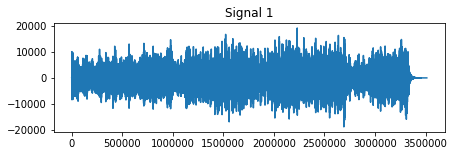

In [6]:
%pylab inline
import matplotlib.pyplot as plt
import pylab as pl
import numpy as np

# load
fs1,s1 = load_wav('Sample1.wav') 

# plot
pl.figure(figsize=(7,2))
pl.plot(s1)
pl.title('Signal 1')
pl.show()



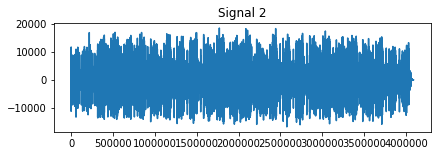

In [8]:
# load
fs2,s2 = load_wav('Sample2.wav') # Terran Battlecruiser - "Good day, commander."

# plot
pl.figure(figsize=(6.75,2))
pl.plot(s2)
pl.title('Signal 2')
pl.show()



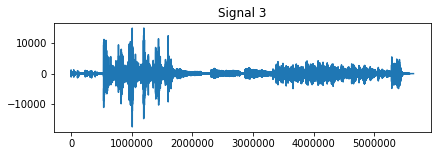

In [9]:
# load
fs3,s3 = load_wav('Sample3.wav') # Protoss Zealot - "My life for Aiur!"

# plot
pl.figure(figsize=(6.75,2))
pl.plot(s3)
pl.title('Signal 3')
pl.show()



Mixing Matrix:
[[1.  0.5 0.5]
 [0.5 1.  0.5]
 [0.5 0.5 1. ]]


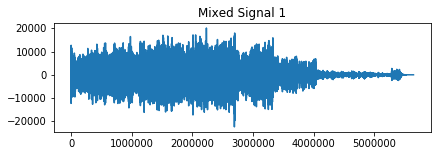

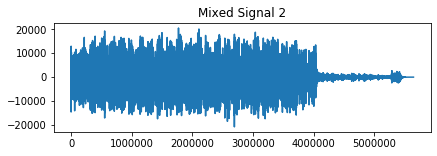

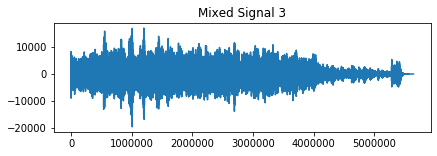

In [11]:
fs = fs1
length = max([len(s1), len(s2), len(s3)])

s1.resize((length,1), refcheck=False)
s2.resize((length,1), refcheck=False)
s3.resize((length,1), refcheck=False)

"""
The function numpy.c_ concatenates the numpy arrays given as input.
The method numpy_array.T is the transpose operation that allow us
to prepare an input source matrix of the right size (3, length),
according to the chosen mixing matrix (3,3).
"""
S = (np.c_[s1, s2, s3]).T

# Mixing Matrix
#A = np.random.uniform(size=(3,3))
#A = A / A.sum(axis=0)
A = np.array([[1, 0.5, 0.5],
              [0.5, 1, 0.5],
              [0.5, 0.5, 1]])
print ('Mixing Matrix:')
print (A.round(2))

# Mixed Signals
X = np.dot(A,S)

# Exploring Mixed Signals
for i in range(X.shape[0]):
    pl.figure(figsize=(6.75,2))
    pl.plot((X[i]).astype(np.int16))
    pl.title('Mixed Signal %d' % (i+1))
    pl.show()
   

In [15]:
from shogun.Features  import RealFeatures

# Convert to features for shogun
mixed_signals = RealFeatures((X).astype(np.float64))

ModuleNotFoundError: No module named 'shogun'

In [16]:
from shogun.Converter import Jade

# Separating with JADE
jade = Jade()
signals = jade.apply(mixed_signals)

S_ = signals.get_feature_matrix()

A_ = jade.get_mixing_matrix()
A_ = A_ / A_.sum(axis=0)

print 'Estimated Mixing Matrix:'
print A_

SyntaxError: Missing parentheses in call to 'print'. Did you mean print('Estimated Mixing Matrix:')? (<ipython-input-16-2cb42cdc4335>, line 12)